In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.stats as stats
  
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ar = [1, -1.5, 0.7] # pole = 0.75 +/- 0.37 j < unit circle
ma = [1.0, 0.6]
pole = np.roots(ar)
print(pole, np.abs(pole))

[0.75+0.37080992j 0.75-0.37080992j] [0.83666003 0.83666003]


In [4]:
np.random.seed(123)
nobs = 10000 # 観測データ数
dist = stats.norm(loc=0, scale=1.0).rvs
y = arma_generate_sample(ar, ma, nsample=nobs, distrvs=dist, burnin=1000)
print(type(y))

<class 'numpy.ndarray'>


In [5]:
arma20 = ARIMA(endog=y, order=(2,0,0), trend='n').fit( ) # order=(p,d,q),  d = 0 in use of ARMA model
arma21 = ARIMA(endog=y, order=(2,0,1), trend='n').fit( ) 
arma32 = ARIMA(endog=y, order=(3,0,2), trend='n').fit( )
arma43 = ARIMA(endog=y, order=(4,0,3), trend='n').fit( )

C:\Users\kusukawa\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
print('arma20-----------summary--------------------')
print(arma20.summary())
print('arma21-----------summary--------------------')
print(arma21.summary())
print('arma32-----------summary--------------------')
print(arma32.summary())
print('arma43-----------summary--------------------')
print(arma43.summary())

arma20-----------summary--------------------
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -15458.464
Date:                Wed, 10 Aug 2022   AIC                          30922.928
Time:                        09:32:25   BIC                          30944.559
Sample:                             0   HQIC                         30930.250
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6422      0.006    291.359      0.000       1.631       1.653
ar.L2         -0.8262      0.006   -146.037      0.000      -0.837      -0.815
sigma2 

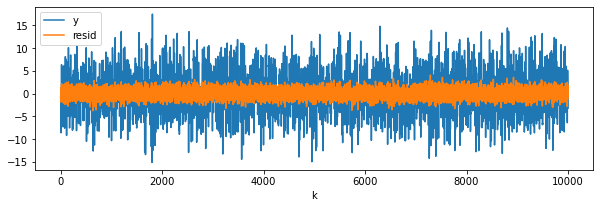

In [7]:
fig = plt.subplots(figsize=(10,3))
plt.plot(y, label='y')
resid = arma21.resid  # short for residual
#print(len(resid))
plt.plot(resid, label='resid')
plt.xlabel('k')
plt.legend()

#plt.savefig('fig_SM_ARMA_Resid.png', bbox_inches='tight')
plt.show()

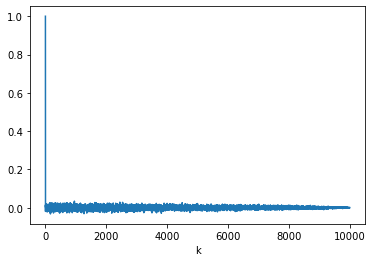

count =  83  len(AutoR) =  10000   rate = 0.0083
k >= 1, max(AutoR[k] = 0.03412501834892055     min(AutorR[k] = -0.032579207221630054


In [8]:
auto_corr = np.correlate(resid, resid, mode='full')
center = int(len(auto_corr)/2)
AutoR = auto_corr[center:]/np.max(auto_corr)
plt.xlabel('k')
plt.plot(AutoR)

#plt.savefig('fig_SM_ARMA_AutoCorr.png')
plt.show()
    
count = 0
for k in np.arange(1,len(AutoR)-1):
    if np.abs(AutoR[k]) > 2.17/np.sqrt(len(AutoR)):
        count += 1
    if np.abs(AutoR[k]) < -2.17/np.sqrt(len(AutoR)):
        count += 1
#        print("Warning", i, AutoR[i])
print('count = ', count, ' len(AutoR) = ', len(AutoR), '  rate =', count/len(AutoR))
print('k >= 1, max(AutoR[k] =', np.max(AutoR[1:]),  '    min(AutorR[k] =', np.min(AutoR[1:]))

In [9]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

from scipy import stats

np.random.seed(123)

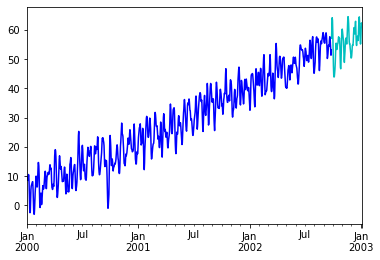

In [10]:
# 観測データ（トレニーングデータ） y
# 予測精度を見るための実データ（テストデータ） y_test
ar = [1, -1.5, 0.7]
ma = [1.0, 0.6]

nobs = 1000
nobs_test = 100
nobs_all = nobs + nobs_test

dist = stats.norm(loc=0, scale=1.0).rvs

# 知りたい信号成分
sig_all = arma_generate_sample(ar, ma, nsample=nobs_all, distrvs=dist, burnin=500)

# トレンドの信号（1次式型）
coef_a, coef_b = 0.05, 4
trend_all = coef_a*np.arange(len(sig_all)) + coef_b

# 出力信号（トレーニングデータ＋テストデータ）
y_all = sig_all + trend_all

# インデックスを与える
index = pd.date_range('1/1/2000', periods=nobs_all, freq='D')
y_all = pd.Series(y_all, index=index)

#信号データにindexを付加
sig_all = pd.Series(sig_all, index=index)

y = y_all[:nobs]      #観測データはｙ
y_test = y_all[nobs:] #予測精度を見るためのテストデータはy_test

y.tail(5)

y.plot(color='b')
y_test.plot(color='c')

#plt.savefig('fig_SM_ARIMA_signal_trend.pdf')
plt.show()

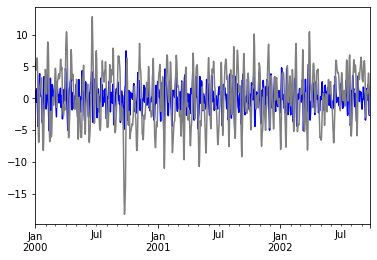

In [11]:
#yの1階差分系列（青），元の信号（灰色）とは振幅，位相が異なることがわかる
diff = (y - y.shift()).dropna(axis=0) #先頭のデータは NaNとなるため
diff.plot(color='b')
sig_all[:nobs-1].plot(color='gray')

#plt.savefig('fig_SM_ARIMA_ident_y_diff.png')
plt.show()

In [12]:
#ARIMAモデル, トレンドが重畳した観測値y に対して適用
arima_result = ARIMA(y, order=(2,1,1), trend='n').fit() # 引数trendは'n'（トレンド無し）を指定
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1466.858
Date:                Wed, 10 Aug 2022   AIC                           2941.717
Time:                        09:50:16   BIC                           2961.344
Sample:                    01-01-2000   HQIC                          2949.176
                         - 09-26-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9758      0.044     22.022      0.000       0.889       1.063
ar.L2         -0.4654      0.038    -12.364      0.000      -0.539      -0.392
ma.L1          0.3049      0.047      6.515      0.0

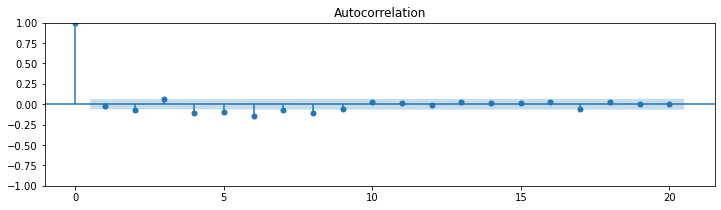

In [13]:
#残差（誤差）系列とその自己相関関数のプロット
#自己相関のプロットでは，sig_valの領域内にあるかを確認する。
resid = arima_result.resid # residual sequence
sig_val = 0.05 # 有意水準

#resid.plot(figsize=(12,4))
#print(stats.normaltest(resid))

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20, alpha=sig_val, ax=ax1)

#plt.savefig('fig_SM_ARIMA_resid_acf.png')
plt.show()

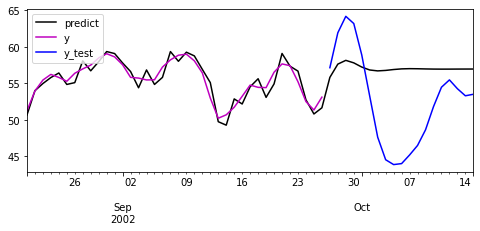

In [14]:
fig = plt.figure(figsize=(8,3))

start, end, pred_start = '2002-08-20', '2002-10-15', '2002-09-27'
pred = arima_result.predict(start=start, end=end)
pred.plot(label='predict', color='k')
y[start:].plot(color='m', label='y')
y_test[pred_start:end].plot(color='b', label='y_test')
plt.legend(loc='upper left')

#plt.savefig('fig_SM_ARIMA_y_predict.png')
plt.show()

In [15]:
#yとy_testのインデックスの先頭と最終の値を知る
#上記のグラフの範囲を定める目安にしたいため。
print(y.index[0], y.index[-1])

2000-01-01 00:00:00 2002-09-26 00:00:00


In [16]:
print(y_test.index[0], y_test.index[-1])

2002-09-27 00:00:00 2003-01-04 00:00:00


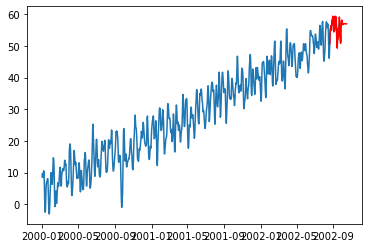

In [17]:
#見る区間を拡げる
plt.plot(y)
plt.plot(pred, color='r')

In [18]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
fname = 'AirPassengers.csv'
df = pd.read_csv(fname, index_col='Date', parse_dates=True)
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [20]:
df.Passengers

Date
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

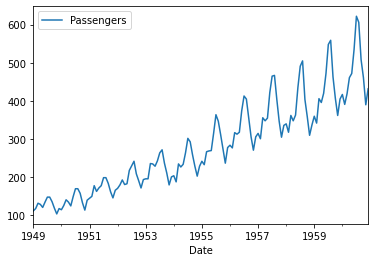

In [21]:
df.plot()

#plt.savefig('fig_SM_SARIMAX_PassengerData.png')
plt.show()

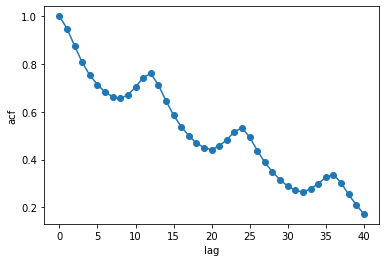

In [22]:
acf = sm.tsa.stattools.acf(df, nlags=40)
#fig, ax = plt.subplots(figsize=(4,4))
plt.plot(acf, marker='o')
plt.xlabel('lag')
plt.ylabel('acf')

#plt.savefig('fig_SM_SARIMAX_PassengerData_acf.png')
plt.show()

In [23]:
#SARIMA_model = sm.tsa.SARIMAX(df, order=(3,1,2), seasonal_order=(1,1,1,12)).fit(method='bfgs', maxiter=500)
SARIMAX_model = sm.tsa.SARIMAX(df, order=(3,1,2), seasonal_order=(1,1,1,12)).fit(maxiter=200)
print(SARIMAX_model.summary())

C:\Users\kusukawa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kusukawa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -502.966
Date:                              Wed, 10 Aug 2022   AIC                           1021.931
Time:                                      10:12:53   BIC                           1044.933
Sample:                                  01-01-1949   HQIC                          1031.278
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6986      1.567      0.446      0.656      -2.373       3.770
ar.L2          0.19

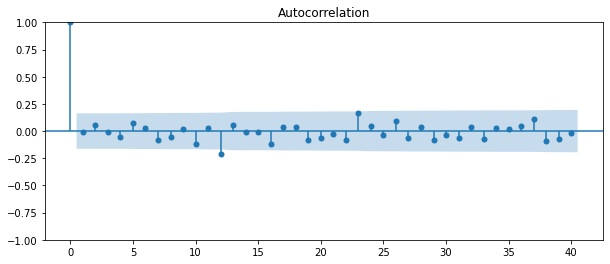

In [24]:
# 残差のチェック
resid = SARIMAX_model.resid
fig, ax = plt.subplots(figsize=(10,4))
fig2 = sm.graphics.tsa.plot_acf(resid, lags=40,  alpha=0.05, ax=ax)

#plt.savefig('fig_SM_SARIMAX_Resid_acf.png')
plt.show()

In [25]:
#予測
pred = SARIMAX_model.predict(start='1960-01-01', end='1962-12-01')

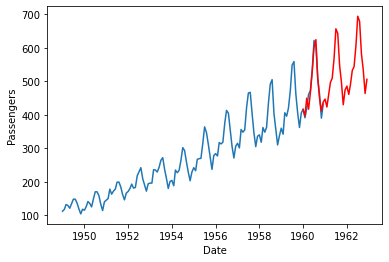

In [26]:
plt.plot(df)
plt.plot(pred, 'r')

plt.xlabel('Date')
plt.ylabel('Passengers')

#plt.savefig('fig_SM_SARIMAX_Predict.png')
plt.show()

In [27]:
print(pred)

1960-01-01    416.016041
1960-02-01    396.425717
1960-03-01    449.500749
1960-04-01    416.677562
1960-05-01    465.536401
1960-06-01    528.724924
1960-07-01    601.712953
1960-08-01    624.248207
1960-09-01    510.737097
1960-10-01    449.896863
1960-11-01    411.037853
1960-12-01    437.835855
1961-01-01    446.775289
1961-02-01    423.228176
1961-03-01    458.189488
1961-04-01    496.833069
1961-05-01    509.479202
1961-06-01    569.172919
1961-07-01    656.814126
1961-08-01    642.868343
1961-09-01    547.921035
1961-10-01    498.469716
1961-11-01    430.009178
1961-12-01    473.780955
1962-01-01    485.668492
1962-02-01    460.889588
1962-03-01    490.282935
1962-04-01    532.364059
1962-05-01    543.975436
1962-06-01    606.872271
1962-07-01    694.229919
1962-08-01    678.730267
1962-09-01    581.322676
1962-10-01    534.144913
1962-11-01    463.608305
1962-12-01    505.946600
Freq: MS, Name: predicted_mean, dtype: float64


In [28]:
print(pred[1])

396.4257173366395
